In [1]:
import numpy as np 
import os
import shutil
import tensorflow as tf
print(os.listdir("/Users/hkemo/Downloads/Dataset"))

['Pred', 'Train']


In [2]:
TRAIN_PATH = "/Users/hkemo/Downloads/Dataset/Train"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input , Activation, MaxPooling2D ,AvgPool2D,MaxPool2D
from tensorflow.keras.layers import Conv2D , SeparableConv2D,BatchNormalization
from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau,Callback
from tensorflow.keras.applications import ResNet50

In [4]:
IMG_W = 180
IMG_H = 180
CHANNELS = 3
INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
EPOCHS = 30
BATCH_SIZE = 64


In [5]:
model = Sequential()
model.add(Conv2D(16, 3, activation='relu', padding='same',input_shape = INPUT_SHAPE))
model.add(Conv2D(16, 3, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(SeparableConv2D(32, 3, activation='relu', padding='same'))
model.add(SeparableConv2D(32, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(SeparableConv2D(64, 3, activation='relu', padding='same'))
model.add(SeparableConv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(SeparableConv2D(128, 3, activation='relu', padding='same'))
model.add(SeparableConv2D(128, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(.2))


model.add(SeparableConv2D(256, 3, activation='relu', padding='same'))
model.add(SeparableConv2D(256, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.7))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.3))

model.add(Dense(1, activation='sigmoid'))

In [25]:
pretrained_model = VGG16(include_top=False, weights='imagenet')

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, None, None, 16)    448       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, None, None, 16)    2320      
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, None, None, 16)    0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, None, None, 32)    688       
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, None, None, 32)    1344      
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, None, None, 32)    128       
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, None, None, 32)    0

In [8]:
class TerminateOnBaseline(Callback):
    
    def __init__(self, monitor='accuracy', baseline=0.99):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

In [9]:
callbacks = [TerminateOnBaseline(monitor='accuracy', baseline=0.988)]

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,rotation_range=40,fill_mode="nearest", horizontal_flip=True,validation_split=0.25)

In [11]:

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

Found 3579 images belonging to 2 classes.


In [12]:
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 1192 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [14]:
    history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS,callbacks=[callbacks])

C:\Users\hkemo\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
55/55 [==============================] - 359s 5s/step - loss: 0.6596 - accuracy: 0.6744 - val_loss: 0.5506 - val_accuracy: 0.7847
Epoch 2/30
55/55 [==============================] - 232s 4s/step - loss: 0.2795 - accuracy: 0.9007 - val_loss: 0.5784 - val_accuracy: 0.7847
Epoch 3/30
55/55 [==============================] - 265s 5s/step - loss: 0.1756 - accuracy: 0.9581 - val_loss: 0.7272 - val_accuracy: 0.7847
Epoch 4/30
55/55 [==============================] - 264s 5s/step - loss: 0.1329 - accuracy: 0.9661 - val_loss: 0.8525 - val_accuracy: 0.7847
Epoch 5/30
55/55 [==============================] - 256s 5s/step - loss: 0.1267 - accuracy: 0.9676 - val_loss: 0.9169 - val_accuracy: 0.7847
Epoch 6/30
55/55 [==============================] - 253s 5s/step - loss: 0.1045 - accuracy: 0.9735 - val_loss: 0.9320 - val_accuracy: 0.7847
Epoch 7/30
55/55 [==============================] - 238s 4s/step - loss: 0.1184 - accuracy: 0.9695 - val_loss: 0.9637 - val_accuracy: 0.7847
Epoch 8/30
55

In [15]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9769558906555176
validation_accuracy 0.9748263955116272


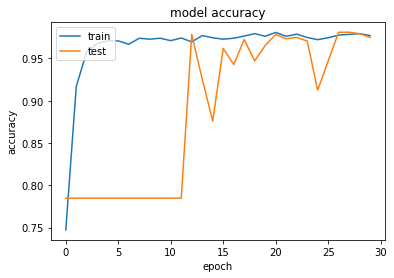

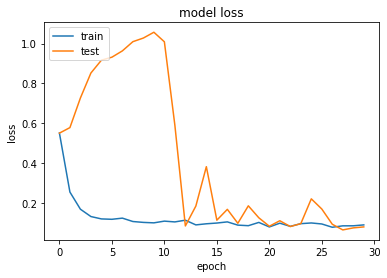

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This Xray Image is of negative covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


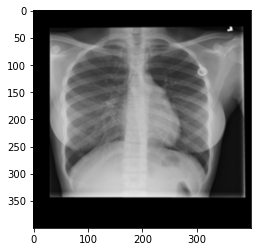

In [23]:
from keras.preprocessing import image
xtest_image = image.load_img('/Users/hkemo/Downloads/Dataset/Pred/Normal-1.png', target_size = INPUT_SHAPE)
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
imggg = cv2.imread('/Users/hkemo/Downloads/Dataset/Pred/Normal-1.png')
print("This Xray Image is of negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

This Xray Image is of postive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


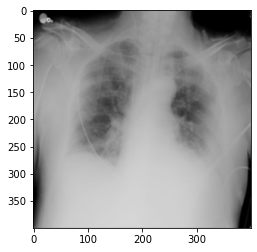

In [22]:
xtest_image = image.load_img('/Users/hkemo/Downloads/Dataset/Pred/COVID-1.png', target_size = INPUT_SHAPE)
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
imggg = cv2.imread('/Users/hkemo/Downloads/Dataset/Pred/COVID-1.png')
print("This Xray Image is of postive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)